<a href="https://colab.research.google.com/github/KartikeyJadli/Sentiment/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all necessary Libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords


In [2]:
# Reading the data
df=pd.read_csv("https://raw.githubusercontent.com/KartikeyJadli/Sentiment/main/Coronavirus_Tweets.csv",encoding='latin1')
print(df.head(15))

    UserName  ScreenName                   Location     TweetAt  \
0       3799       48751                     London  16-03-2020   
1       3800       48752                         UK  16-03-2020   
2       3801       48753                  Vagabonds  16-03-2020   
3       3802       48754                        NaN  16-03-2020   
4       3803       48755                        NaN  16-03-2020   
5       3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6       3805       48757       35.926541,-78.753267  16-03-2020   
7       3806       48758                    Austria  16-03-2020   
8       3807       48759            Atlanta, GA USA  16-03-2020   
9       3808       48760           BHAVNAGAR,GUJRAT  16-03-2020   
10      3809       48761             Makati, Manila  16-03-2020   
11      3810       48762  Pitt Meadows, BC, Canada   16-03-2020   
12      3811       48763                 Horningsea  16-03-2020   
13      3812       48764                Chicago, IL  16-03-202

In [3]:
# Converting our dataset in DataFrame with two attributes
dataset=pd.DataFrame(df,columns=['OriginalTweet','Sentiment'])
dataset.head(10)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


[None, None, None, None, None, None, None, None, None, None]

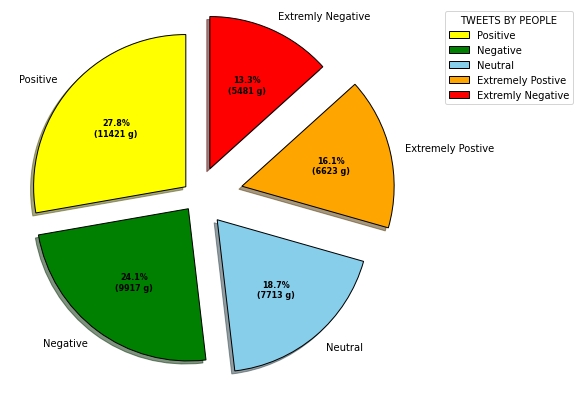

In [4]:
count=dataset["Sentiment"].value_counts()
labels=["Positive","Negative","Neutral","Extremely Postive","Extremly Negative"]
# plt.pie(count,labels=labels)
# plt.legend(["0","1","2","3","4"],labels)
# plt.show()
wp = { 'linewidth' : 1, 'edgecolor' : "Black" }
colors = ['yellow','green','skyblue','orange',"red"]
myexplode = [0.1, 0.1, 0.2, 0.3, 0.2]

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(count,autopct = lambda pct: func(pct, count),explode = myexplode,labels = labels,shadow = True,startangle = 90,wedgeprops = wp,colors = colors)

# Adding legend
ax.legend(wedges, labels,title ="TWEETS BY PEOPLE",loc ="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")

In [5]:
# Creating a function to remove the pattern(@gmail.com)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
# Create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,Cashier at grocery store was sharing his insig...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,Was at the supermarket today. Didn't buy toile...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,Due to COVID-19 our retail store and classroom...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,"For corona prevention,we should stop to buy th..."


In [6]:
# Removing the links from the tweets
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['Tweet'].head(15)

0                                                      
1     advice Talk to your neighbours family to excha...
2     Coronavirus Australia: Woolworths to give elde...
3     My food stock is not the only one which is emp...
4     Me, ready to go at supermarket during the #COV...
5     As news of the regionÂs first confirmed COVID...
6     Cashier at grocery store was sharing his insig...
7     Was at the supermarket today. Didn't buy toile...
8     Due to COVID-19 our retail store and classroom...
9     For corona prevention,we should stop to buy th...
10    All month there hasn't been crowding in the su...
11    Due to the Covid-19 situation, we have increas...
12    #horningsea is a caring community. LetÂs ALL ...
13    Me: I don't need to stock up on food, I'll jus...
14    ADARA Releases COVID-19 Resource Center for Tr...
Name: Tweet, dtype: object

In [7]:
# Replacing/Removing the hashtags from the tweets
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')
df['Tweet'].head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0                                                      
1     advice Talk to your neighbours family to excha...
2     Coronavirus Australia Woolworths to give elder...
3     My food stock is not the only one which is emp...
4     Me ready to go at supermarket during the #COVI...
5     As news of the region s first confirmed COVID ...
6     Cashier at grocery store was sharing his insig...
7     Was at the supermarket today Didn t buy toilet...
8     Due to COVID our retail store and classroom in...
9     For corona prevention we should stop to buy th...
10    All month there hasn t been crowding in the su...
11    Due to the Covid situation we have increased d...
12    #horningsea is a caring community Let s ALL lo...
13    Me I don t need to stock up on food I ll just ...
14    ADARA Releases COVID Resource Center for Trave...
15    Lines at the grocery store have been unpredict...
16                                               # # # 
17     MAR Russia consumer surveillance watchdog

In [8]:
# Removing all words which have length less than 3
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the only one which empty PLEASE...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during the #COVID outbreak N...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news the region first confirmed COVID case cam...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,Cashier grocery store was sharing his insights...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,Was the supermarket today Didn buy toilet pape...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,Due COVID our retail store and classroom Atlan...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,For corona prevention should stop buy things w...


In [9]:
# Converting the tweets comments in array by splitting them
df['Tweet'] = df['Tweet'].apply(lambda x: x.split())
df['Tweet'].head(20)

0                                                    []
1     [advice, Talk, your, neighbours, family, excha...
2     [Coronavirus, Australia, Woolworths, give, eld...
3     [food, stock, not, the, only, one, which, empt...
4     [ready, supermarket, during, the, #COVID, outb...
5     [news, the, region, first, confirmed, COVID, c...
6     [Cashier, grocery, store, was, sharing, his, i...
7     [Was, the, supermarket, today, Didn, buy, toil...
8     [Due, COVID, our, retail, store, and, classroo...
9     [For, corona, prevention, should, stop, buy, t...
10    [All, month, there, hasn, been, crowding, the,...
11    [Due, the, Covid, situation, have, increased, ...
12    [#horningsea, caring, community, Let, ALL, loo...
13    [don, need, stock, food, just, have, Amazon, d...
14    [ADARA, Releases, COVID, Resource, Center, for...
15    [Lines, the, grocery, store, have, been, unpre...
16                                                   []
17    [MAR, Russia, consumer, surveillance, watc

In [10]:
# Converting all the words to their root words Eg:runner,running-->run
df['Tweet'] = df['Tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,"[advic, talk, your, neighbour, famili, exchang..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronaviru, australia, woolworth, give, elder..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,"[food, stock, not, the, onli, one, which, empt..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[readi, supermarket, dure, the, #covid, outbre..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,"[news, the, region, first, confirm, covid, cas..."
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,"[cashier, groceri, store, wa, share, hi, insig..."
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,"[wa, the, supermarket, today, didn, buy, toile..."
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,"[due, covid, our, retail, store, and, classroo..."
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,"[for, corona, prevent, should, stop, buy, thin..."


In [11]:
# Again Joining the Tweets
for i in range(len(df['Tweet'])):
    df['Tweet'][i] = ' '.join(df['Tweet'][i])
df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk your neighbour famili exchang phone...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not the onli one which empti pleas ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi supermarket dure the #covid outbreak not...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news the region first confirm covid case came ...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier groceri store wa share hi insight #cov...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,wa the supermarket today didn buy toilet paper...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,due covid our retail store and classroom atlan...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,for corona prevent should stop buy thing with ...


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# from nltk.corpus import stopwords(which does not add meaning to sentance like and,is the)
stop = stopwords.words('english')

# Removing all the stop words from tweets and store it in stopword_x
stopword_x=df['Tweet'].apply(lambda x: [item for item in x if item not in stop])
stopword_x.head(30)

0                                                    []
1     [v, c,  , l, k,  , u, r,  , n, e, g, h, b, u, ...
2     [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, ...
3     [f,  , c, k,  , n,  , h, e,  , n, l,  , n, e, ...
4     [r, e,  , u, p, e, r, r, k, e,  , u, r, e,  , ...
5     [n, e, w,  , h, e,  , r, e, g, n,  , f, r,  , ...
6     [c, h, e, r,  , g, r, c, e, r,  , r, e,  , w, ...
7     [w,  , h, e,  , u, p, e, r, r, k, e,  ,  , n, ...
8     [u, e,  , c, v,  , u, r,  , r, e, l,  , r, e, ...
9     [f, r,  , c, r, n,  , p, r, e, v, e, n,  , h, ...
10    [l, l,  , n, h,  , h, e, r, e,  , h, n,  , b, ...
11    [u, e,  , h, e,  , c, v,  , u,  , h, v, e,  , ...
12    [#, h, r, n, n, g, e,  , c, r, e,  , c, u, n, ...
13    [n,  , n, e, e,  , c, k,  , f,  , j, u,  , h, ...
14    [r,  , r, e, l, e,  , c, v,  , r, e, u, r, c, ...
15    [l, n, e,  , h, e,  , g, r, c, e, r,  , r, e, ...
16                                                   []
17    [r,  , r, u,  , c, n, u,  , u, r, v, e, l,

In [14]:
# Considered only two atrributes preprocessed Tweets and sentiment and save it in cdf
cdf=df[['Tweet','Sentiment']]
cdf.head(10)

,Tweet,Sentiment
0,,Neutral
1,advic talk your neighbour famili exchang phone...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock not the onli one which empti pleas ...,Positive
4,readi supermarket dure the #covid outbreak not...,Extremely Negative
5,news the region first confirm covid case came ...,Positive
6,cashier groceri store wa share hi insight #cov...,Positive
7,wa the supermarket today didn buy toilet paper...,Neutral
8,due covid our retail store and classroom atlan...,Positive
9,for corona prevent should stop buy thing with ...,Negative


In [15]:
# Being sure that we do not have null values
cdf.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
# Dividing our dataset in training and testing subset which have same labels
train,test= train_test_split(cdf,test_size = 0.4,random_state=0,stratify = cdf.Sentiment.values) 
print("Train shape : ", train.shape)
print("Test shape : ", test.shape)

Train shape :  (24694, 2)
Test shape :  (16463, 2)


In [17]:
# Countvectorizer count the each word and make them like an attribute
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)
print(vectorizer)

CountVectorizer(decode_error='replace',
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])


In [18]:
# X_train,X_test are the features(independent variable) on which our sentiment depends
X_train = vectorizer.fit_transform(train.Tweet.values)
X_test = vectorizer.transform(test.Tweet.values)

# y_train,y_test are the sentiments(dependent variable) which our model will predict
y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (24694, 23116)
X_test.shape :  (16463, 23116)
y_train.shape :  (24694,)
y_test.shape :  (16463,)


Training accuracy Score    :  0.856807321616587
Test accuracy Score :  0.5519042701816194
                    precision    recall  f1-score   support

Extremely Negative       0.63      0.64      0.63      2171
Extremely Positive       0.65      0.63      0.64      2738
          Negative       0.39      0.50      0.44      3075
           Neutral       0.76      0.55      0.64      4311
          Positive       0.46      0.50      0.48      4168

          accuracy                           0.55     16463
         macro avg       0.58      0.56      0.56     16463
      weighted avg       0.58      0.55      0.56     16463



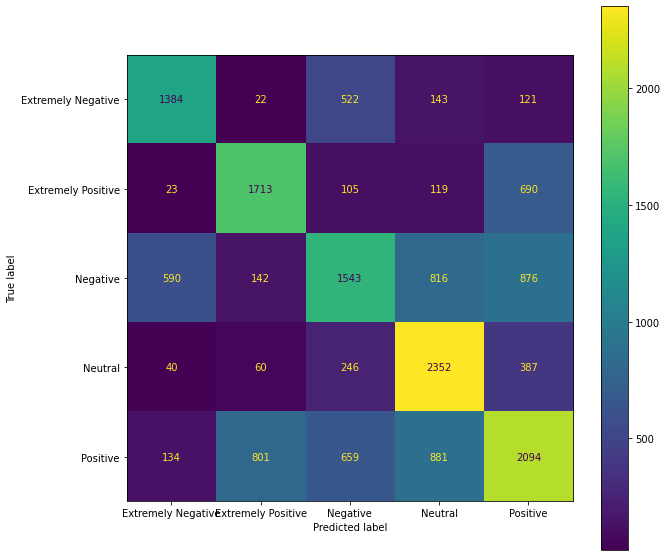

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix

# Using Stochastic Gradient Descent(SGD) to train our model
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

# Predicting the sentiment for test dataset
sgd_prediction = sgd_clf.predict(X_test)

# Finding the Accuracy Score that how our model is?
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Test accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))
fig, ax = plt.subplots(figsize=(10,10)) 
cm = confusion_matrix(y_test, sgd_prediction, labels=sgd_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot(ax=ax)
plt.show()